<a href="https://colab.research.google.com/github/HyunPH/23-1_LA2/blob/main/%5B04%EC%8B%A4%EC%8A%B5%5DMatrix_Decompositions_smung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import numpy.linalg as npl #linear algebra
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [3]:
plt.rcParams[ "figure.figsize" ] = (10, 10)
origin2D = np.array([0, 0])
origin3D = np.array([0, 0, 0])
scale = 10

# 4.4 Singular value decomposition (SVD)

## 1) Stonhenge 이미지 파일 파악   

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=595x842 at 0x7FCCAFF66F80>
PNG
(595, 842)
RGBA


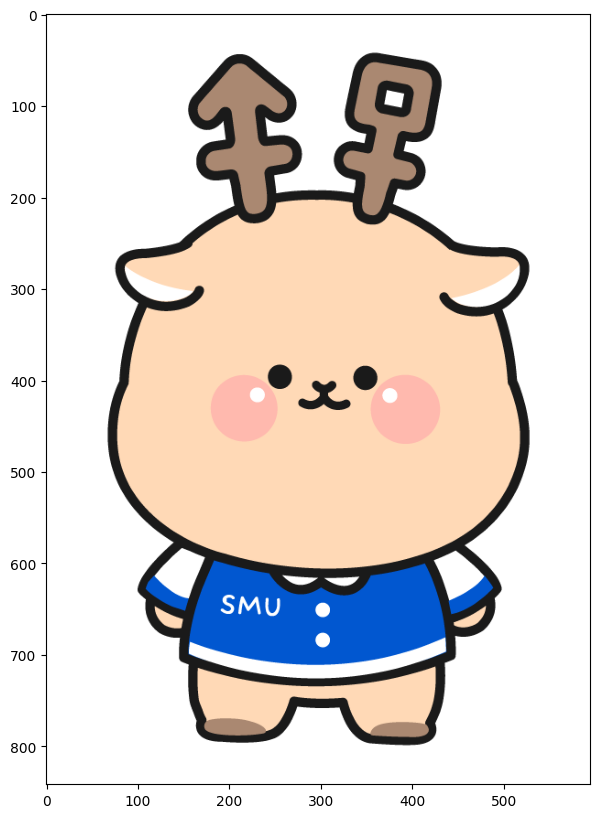

In [4]:
stonehenge = Image.open('smung.png')
print(stonehenge)
print(stonehenge.format)
print(stonehenge.size)
print(stonehenge.mode)

plt.imshow(stonehenge)
plt.show()

## 2) 픽셀값 0~1 사이로 만들기   

In [5]:
# RGB -> grayscale 로 바꾸기
# numpy arra 로 바꾸기
imMatrix = np.array(stonehenge.convert("L"))/255.0 # 0~1 사이값으로 만들기
print(imMatrix.shape)
print(imMatrix)

(842, 595)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 3) SVD 수행

(842, 842) (842, 595) (595, 595)
True


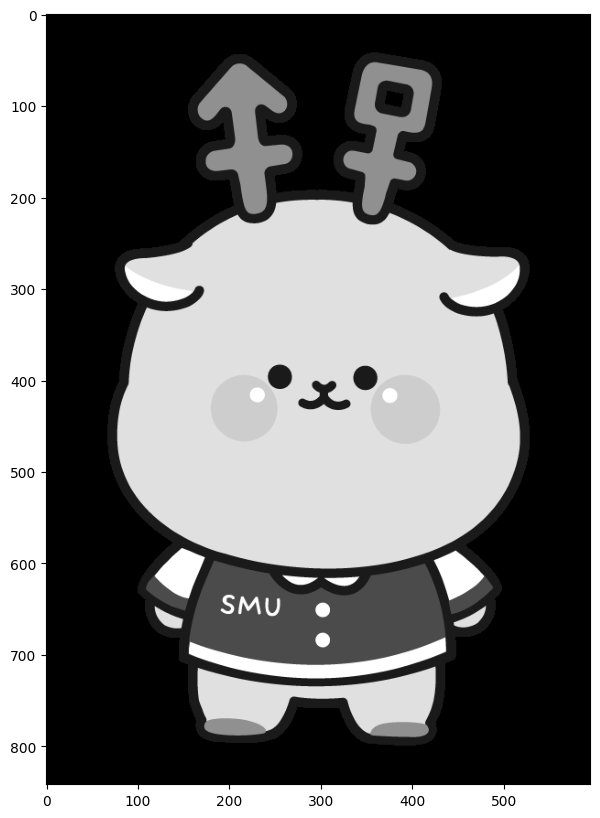

In [10]:
scalar = 1/2 # Testing reconstruction of image.
shape = np.shape(imMatrix) # (h, w)
U, S, V = npl.svd(imMatrix)


# h x h identity matrix 곱하기 singluar value (842, 842)


if shape[0] > shape[1]: # h-w 만큼 밑에 0 붙이기
  Sd = np.vstack([ np.eye(shape[1])*S.copy(), np.zeros((shape[0] - shape[1], shape[1])) ])
else: # w-h 만큼 뒤에 0 붙이기
  Sd = np.hstack([ np.eye(shape[0])*S.copy(), np.zeros((shape[0], shape[1] - shape[0])) ])

print(np.shape(U), np.shape(Sd), np.shape(V))


# --- Image reconstruction with the SVD ---
# Check 1. 원본 영상 vs. U x Sd x V
# U x Sd x V
usv = U @ Sd @ V # (python 3.5 이상)
print(np.allclose(imMatrix, usv)) # 원본과 U Sd V 가 같다면 True

# Cheak 2. U x Sd x V 그려보기
plt.imshow(usv, cmap = 'gray')
plt.show()

## 4) Ai 시각화

(842, 1)
(1, 1)
(1, 595)
2 [(842, 595), (842, 842), (842, 595), (595, 595)]
1438 500990 0.002870316772789876


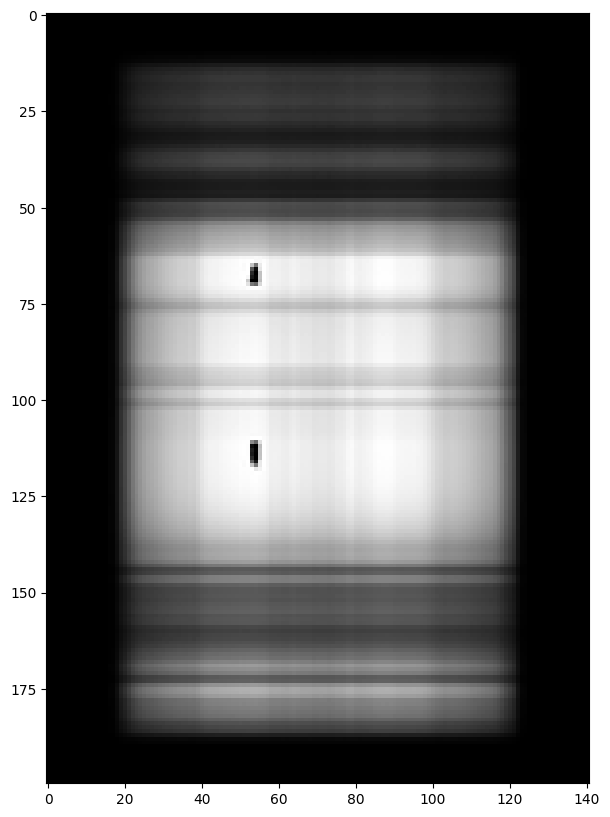

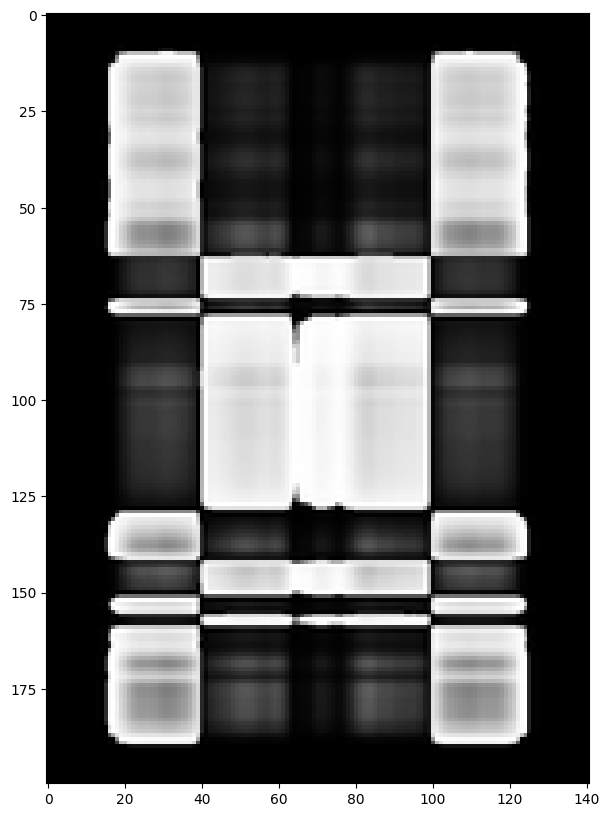

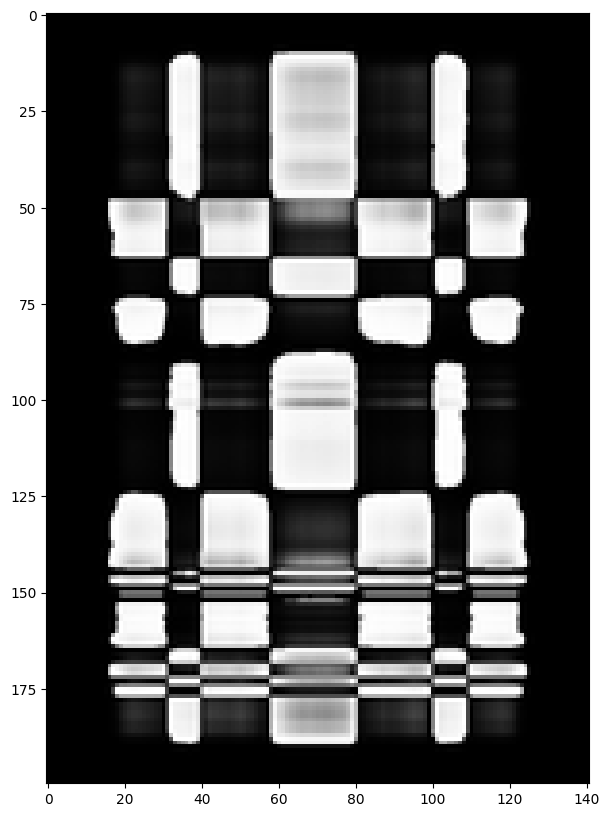

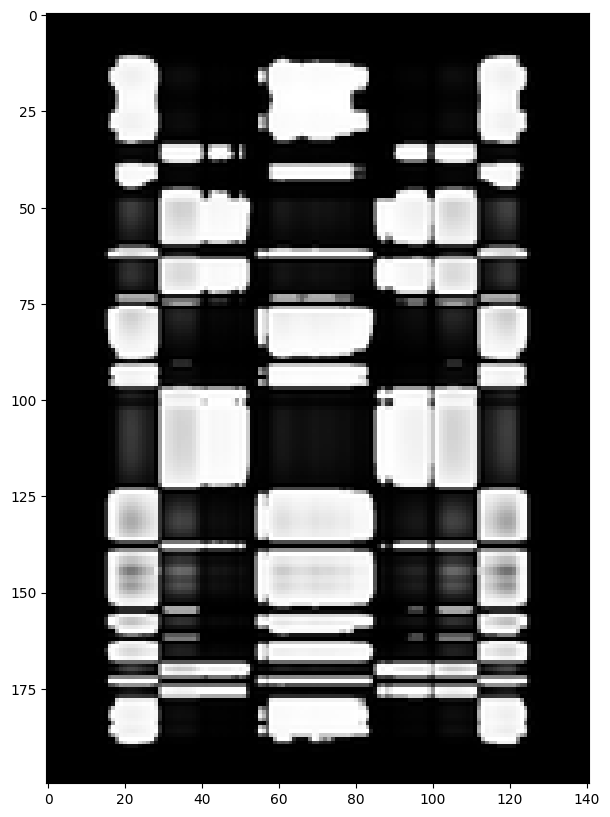

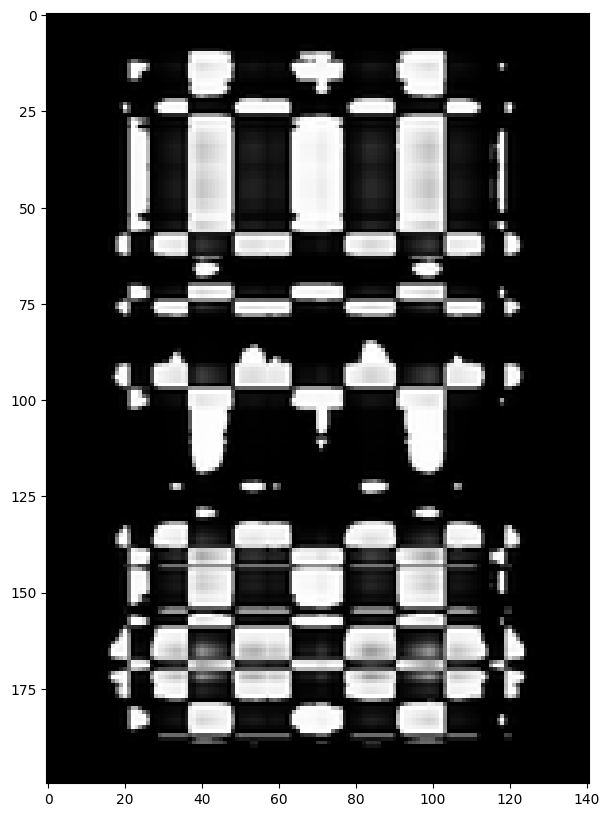

In [11]:
k = 1
print(np.shape(U[:, :k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:, :k].T))

m, n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial/total)

size = (200, 200)
imtemp = lambda k: (np.vstack(U[:, k-1]) @ np.vstack([S[k-1]]) @ np.vstack(V[k-1]).T)*255
for i in list(range(1, 6)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  im.thumbnail(size, Image.ANTIALIAS)
  plt.imshow(im, cmap = 'gray')
  plt.show()
  

## 5) A^(i) 시각화

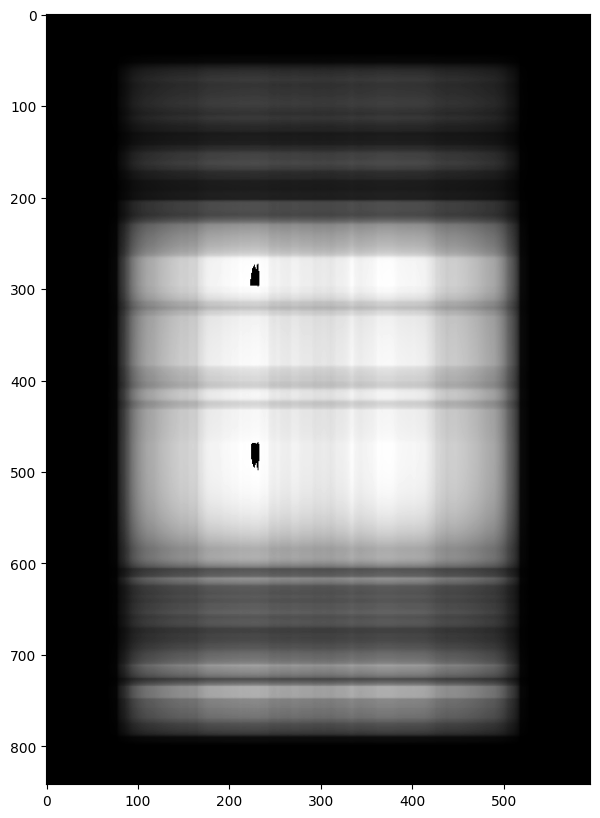

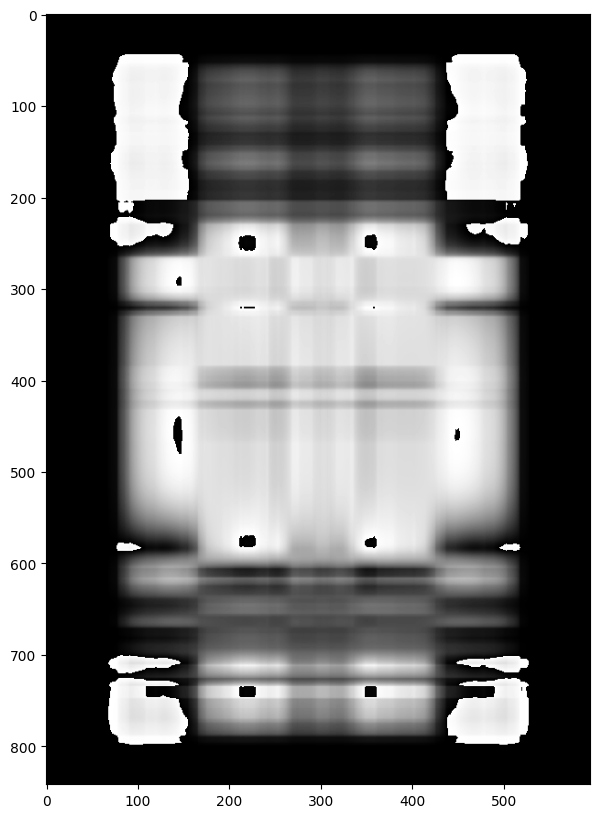

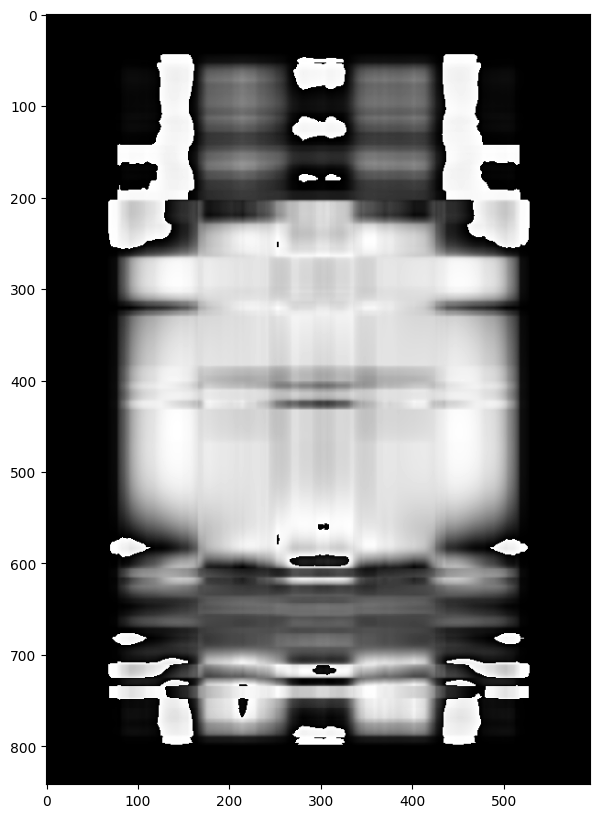

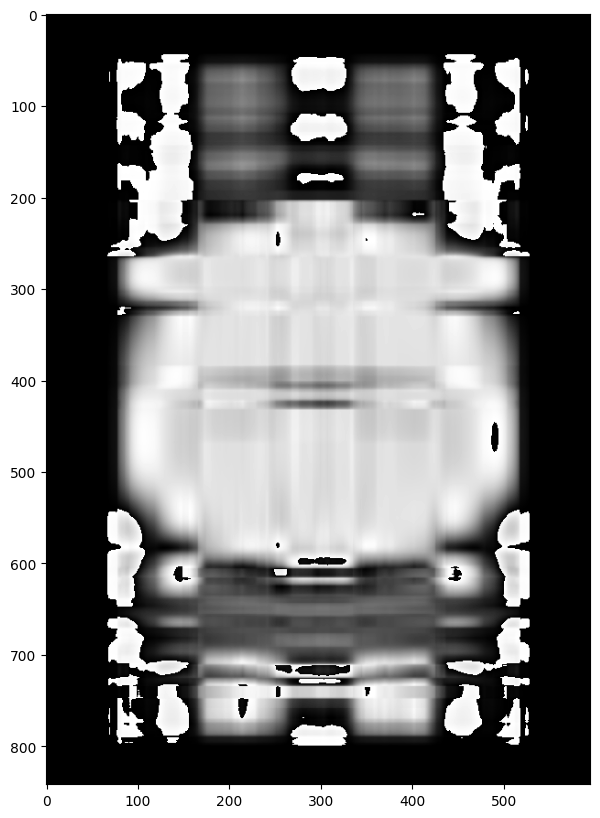

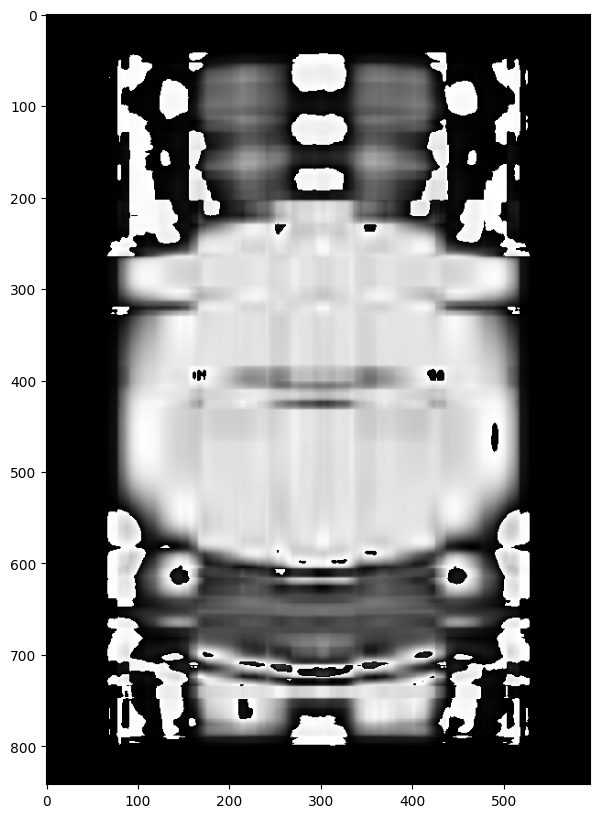

In [12]:
quality = 5 # 5번 실행
np.shape(np.diag(S[:quality]))
np.shape(U[:, :quality])
np.shape(V[:quality, :])
k = quality
m, n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]]

imtemp = lambda k: (U[:, :k] @ np.diag(S[:k]) @ V.T[:, :k].T)*255 # V[:k, :] also works
for i in list(range(1, k+1)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  plt.imshow(im, cmap = 'gray')
  plt.show()

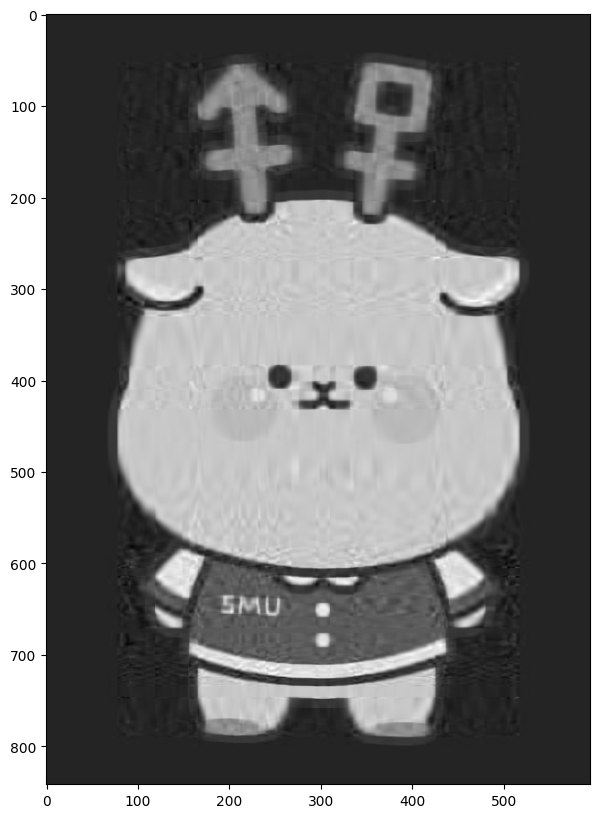

In [13]:
k = 30 #30번 실행
im = imtemp(k)
#image.fromarray(imtemp(k).astype('uint8')) # An approximation at rank 50.
m, n = np.shape(imMatrix)
partial, total = (k*(m+n)+k, m*n)
partial, total, partial/total

plt.imshow(im, cmap = 'gray')
plt.show()